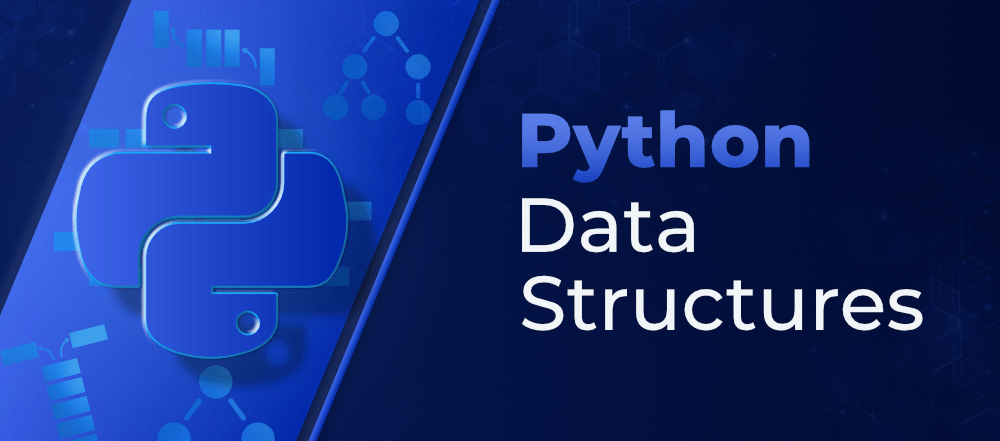

## Array

An array is a data structure that stores elements of the same type in contiguous memory locations. Each element in an array is identified by an index or a key. Arrays provide a straightforward way to represent and manipulate collections of data.

Random Access:

* Elements in an array can be directly accessed using their index. This allows for constant-time access to any element, making random access very efficient.

Memory Efficiency:
* Arrays are memory-efficient due to their contiguous memory allocation. The elements are stored in adjacent locations, which reduces memory overhead.

Simple Implementation:
        
* Arrays are easy to understand and implement. The concept of indexing and direct access simplifies the manipulation of data.


### Efficiency, Cost, and Time Complexity:

Efficiency:

* Arrays are efficient for random access and simple operations. Accessing an element by index is fast (O(1)).

Cost:

* Arrays are generally cost-effective in terms of memory usage, especially when the size is known in advance.

Time Complexity:

* Accessing an element in an array has a time complexity of O(1). However, insertion and deletion operations in the middle of the array have a time complexity of O(n) due to the need to shift elements.

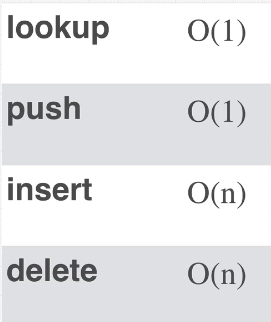

In [100]:
class MyCustomList:

    def __init__(self):
        self.length = 0
        self.data = {}

    def get(self, index):
        """Lookup | O(1)"""
        if not self.length:
            return
        return self.data[index]

    def push(self, item):
        """Push | O(1)"""
        self.data[self.length] = item
        self.length += 1

    def pop(self):
        """Pop | O(1)"""
        last_item = self.data[self.length-1]
        del self.data[self.length-1]
        self.length -= 1
        return last_item

    def delete(self, index):
        """Delete | O(n)"""
        self._shift_items(index)

    def insert(self, index, value):
        """Insert | O(n)"""
        for i in range(self.length, index, - 1): # Make a room for the new value
            self.data[i] = self.data[i - 1]
        self.data[index] = value
        self.length += 1

    def _shift_items(self, index):
        for i in range(index, self.length - 1):
            self.data[i] = self.data[i+1]
        del self.data[self.length-1]
        self.length -= 1

    def __repr__(self):
        return repr(self.data)

custom_list = MyCustomList()
custom_list.push('hi')
custom_list.push('how')
custom_list.push('are')
custom_list.push('you?')

custom_list.delete(0)
custom_list.delete(1)
custom_list.delete(2)
custom_list.delete(3)

custom_list.insert(0, 'whats')
custom_list.insert(1, 'up')
custom_list.insert(2, 'dog')

print(custom_list)

{0: 'whats', 1: 'up', 2: 'dog'}


## Hash Map

A hash table, also known as a hash map, is a data structure that allows the efficient storage and retrieval of key-value pairs. It is based on the idea of using a hash function to map keys to indices in an array, where the associated values are stored. This mapping allows for constant-time average case complexity for search, insert, and delete operations.

Key Components:

*    Array: Hash tables use an array to store data. Each index in the array corresponds to a "bucket" where key-value pairs may be stored.

*    Hash Function: A hash function takes a key as input and returns an index in the array where the corresponding value should be stored. The goal is to distribute the keys uniformly across the array, minimizing collisions (two keys mapping to the same index).

*    Collision Resolution: Collisions occur when two keys hash to the same index. Various techniques, such as chaining (using linked lists at each index) or open addressing (finding the next available slot in the array), are employed to resolve collisions.

Operations:

*    Insertion (or Update): Compute the hash of the key, find the corresponding index in the array, and insert the key-value pair at that index.

*    Retrieval: Given a key, compute its hash, find the corresponding index, and retrieve the associated value. This operation has an average-case time complexity of O(1).

*    Deletion: Similar to retrieval, compute the hash of the key, find the corresponding index, and remove the key-value pair from that index.

Advantages:

*    Fast Average-Case Performance: Hash tables provide constant-time average-case complexity for key-based operations, making them highly efficient for search, insert, and delete operations.

*    Flexible Key Types: Hash tables can handle a wide range of key types, including integers, strings, and more complex objects.

Challenges:

*    Collisions: Collisions can occur when two keys hash to the same index. Efficient collision resolution strategies are crucial for maintaining performance.

*   Deterministic Hash Function: For hash tables to work effectively, the hash function should be deterministic, meaning the same input key will always produce the same hash value.

*    Memory Usage: Hash tables may consume more memory than other data structures due to the need for an array large enough to accommodate potential keys.

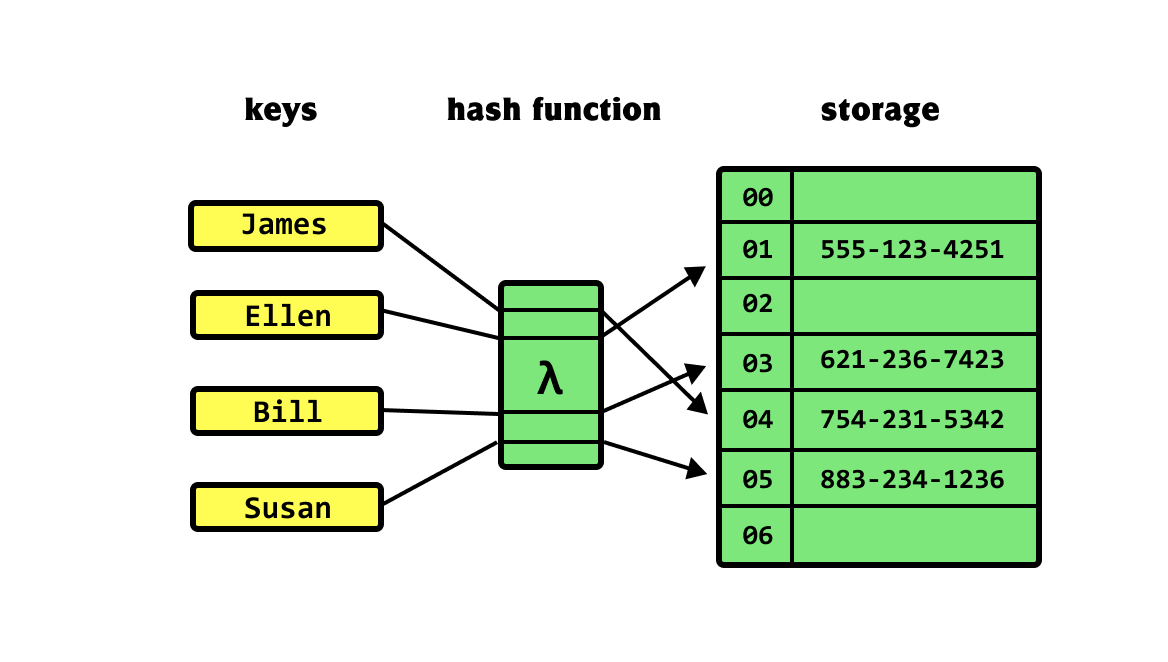

* ### Time Complexity:

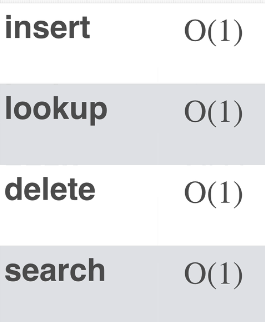

#### Simple Hash Function

In [1]:
def get_hash(key):
    h = 0
    for char in key:
        h += ord(char)
    return h % 100

get_hash('march 6')

9

#### Simple Hash Table

In [4]:
class HashTable:
    """Hash Table | O(1)"""

    def __init__(self):
        self.MAX = 100
        self.arr = [None for i in range(self.MAX)]

    def get_hash(self, key):
        h = 0
        for char in key:
            h += ord(char)
        return h % self.MAX

    def __setitem__(self, key, val):
        h = self.get_hash(key)
        self.arr[h] = val

    def __getitem__(self, key):
        h = self.get_hash(key)
        return self.arr[h]

    def __delitem__(self, key):
        h = self.get_hash(key)
        self.arr[h] = None

#### Extracting the hash value from a key

In [5]:
t = HashTable()
t.get_hash('march 6')

9

#### Creating key and value for hash table

In [ ]:
t['march 6'] = 130
t['march 1'] = 20
t.arr

#### Accessing value from key

In [19]:
t['march 6']

130

### Handling collisions

Collision handling in hash maps refers to the situation where two or more keys hash to the same location, causing a conflict. In simple terms, it's like having multiple keys trying to occupy the same slot in a storage space.

To handle collisions, there are different strategies:

1. Chaining: Instead of storing a single value in a hash table slot, we store a linked list of values. When a collision occurs, new elements are added to the linked list at that slot.

2. Open Addressing: In this approach, when a collision happens, the algorithm looks for the next available slot in the vicinity. It might be the next slot or found by a specific probing sequence.

These methods help ensure that even if multiple keys hash to the same location, the hash map can still store and retrieve the values associated with each key. It's like having a backup plan for when two or more keys want to occupy the same address in the hash map.

#### Chaining 

In [127]:
class HashTable2:
    """Hash Table with Chaining | O(n) or O(1)"""

    def __init__(self):
        self.MAX = 10
        self.arr = [[] for i in range(self.MAX)]

    def get_hash(self, key):
        h = 0
        for char in key:
            h += ord(char)
        return h % self.MAX

    def __setitem__(self, key, val):
        h = self.get_hash(key)
        found = False
        for idx, element in enumerate(self.arr[h]):
            if len(element) == 2 and element[0] == key:
                self.arr[h][idx] = (key, val)
                found = True
        if not found:
            self.arr[h].append((key, val))

    def __getitem__(self, key):
        h = self.get_hash(key)
        if self.arr[h]:
            for element in self.arr[h]:
                if element[0] == key:
                    return element[1]

    def __delitem__(self, key):
        h = self.get_hash(key)
        for idx, element in enumerate(self.arr[h]):
            if element[0] == key:
                del self.arr[h][idx]
        self.arr[h] = None

In [129]:
hash_table = HashTable2()
hash_table['abcd'] = 12
hash_table['dbac'] = 15

hash_table.arr

[[], [], [], [], [('abcd', 12), ('dbac', 15)], [], [], [], [], []]

### Linear Probing | Open Addressing

##### Solution 1

In [152]:
class HashTable3:
    """Hash Table with linear probing | O(n) or O(1)"""

    def __init__(self):
        self.MAX = 10
        self.arr = [[] for i in range(self.MAX)]
        self.position = 0

    def get_hash(self, key):
        h = 0
        for char in key:
            h += ord(char)
        return h % self.MAX

    def __setitem__(self, key, val):
        h = self.get_hash(key)
        filled = False
        while h < self.MAX:
            if self.arr[h]:
                if all(sub for sub in self.arr):
                    raise Exception("HashMap Full")

                if key in self.arr[h]:
                    break

                filled = True
                h += 1
                if h == self.MAX:
                    h = 0

            else:
                filled = False
                break

        if not filled:
            self.arr[h] = (key, val)


    def __getitem__(self, key):
        h = self.get_hash(key)
        if self.arr[h]:
            for element in self.arr:
                if element[0][0] == key:
                    return element[1]

    def __delitem__(self, key):
        h = self.get_hash(key)
        for idx, element in enumerate(self.arr):
            if element[0][0] == key:
                del self.arr[h][idx]
        self.arr[h] = None

In [153]:
hash_table = HashTable3()
hash_table["abcxd"] = 1
hash_table["bxdca"] = 9
hash_table["caxdb"] = 3
hash_table["adxbc"] = 2
hash_table["cbdax"] = 11
hash_table["xabdc"] = 13
hash_table["cxbda"] = 15

hash_table.arr

[('cxbda', 15),
 [],
 [],
 [],
 ('abcxd', 1),
 ('bxdca', 9),
 ('caxdb', 3),
 ('adxbc', 2),
 ('cbdax', 11),
 ('xabdc', 13)]

##### Solution 2

In [155]:
arr = [1,2, 3, 4, 5, 6, 7]

def get_prob_range(index, arr):
    return [*range(index, len(arr))] + [*range(0,index)]

print(get_prob_range(5, arr))

[5, 6, 0, 1, 2, 3, 4]


In [164]:
class HashTable4:
    """Hash Table with linear probing | O(n) or O(1)"""

    def __init__(self) -> None:
        self.MAX = 10
        self.arr = [None for i in range(self.MAX)]

    def __setitem__(self, key, value) -> None:
        h = self._get_hash(key)
        if self.arr[h] is None:
            self.arr[h] = (key, value)
        else:
            new_h = self._find_slot(key, h)
            self.arr[new_h] = (key, value)

    def __getitem__(self, key):
        h = self._get_hash(key)
        if self.arr[h] is None:
            return
        prob_range = self._get_prob_range(key)
        for idx in prob_range:
            element = self.arr[idx]
            if element is None:
                return
            if element[0] == key:
                return element[1]

    def __delitem__(self, key):
        h = self._get_hash(key)
        prob_range = self._get_prob_range(h)
        for idx in prob_range:
            if self.arr in prob_range:
                if self.arr[prob_range] is None:
                    raise Exception("Key not found")
                if self.arr[idx][0] == key:
                    self.arr[idx] = None
        print(self.arr)

    def _get_hash(self, key):
        hash = 0
        for idx in key:
            hash += ord(idx)
        return hash % self.MAX

    def _get_prob_range(self, index):
        return [*range(index, len(self.arr))] + [*range(0,index)]

    def _find_slot(self, key, h):
        prob_range = self._get_prob_range(h)
        for idx in prob_range:
            if self.arr[idx] is None:
                return idx
            if self.arr[idx][0] == key:
                return idx
        raise Exception("HashMap Full")

In [166]:
hash_table = HashTable4()
hash_table["abcxd"] = 1
hash_table["bxdca"] = 9
hash_table["caxdb"] = 3
hash_table["adxbc"] = 2
hash_table["cbdax"] = 11
hash_table["xabdc"] = 13
hash_table["cxbda"] = 17

hash_table.arr

[('cxbda', 17),
 None,
 None,
 None,
 ('abcxd', 1),
 ('bxdca', 9),
 ('caxdb', 3),
 ('adxbc', 2),
 ('cbdax', 11),
 ('xabdc', 13)]

## Linked Lists

Linked list is a linear and dynamic data structure. It is composed of a sequence of nodes or cells that contain their data and also one or two pointers ("links") pointing to the previous or next node. Linked lists are useful for representing dynamic sets of data. In other words, you do not need to define a maximum size for a linked list.

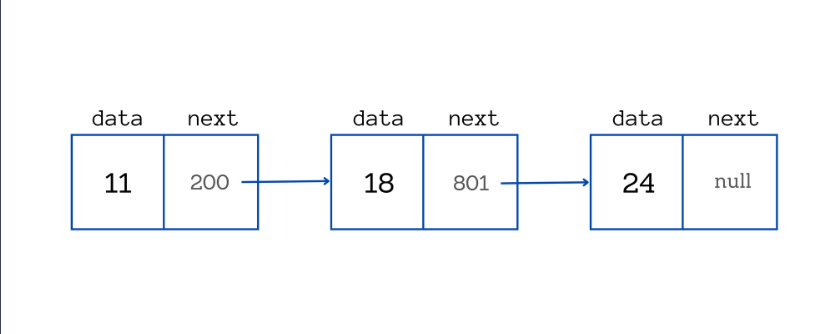

### Simple Linked List

In [41]:
class Node:
    def __init__(self, data=None, next=None):
        self.data = data
        self.next = next

class LinkedList:
    def __init__(self):
        self.head = None

    def add(self, data):
        node = Node(data, self.head)
        self.head = node
        # head -> Node(4, Node(0, None))

    def print(self):
        itr = self.head
        llstr = ''
        while itr:
            llstr += str(itr.data) + ' --> '
            itr = itr.next
        print(llstr)

ll = LinkedList()
ll.add(0)
ll.add(4)
ll.print()

4 --> 0 --> 


#### Node object iteration process:

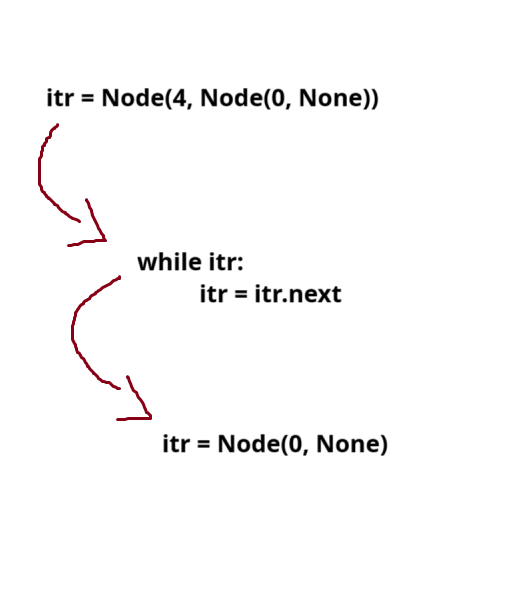

### Complete Linked List

In [51]:
class Node:
    def __init__(self, d, n) -> None:
        self.data = d
        self.next = n

class LinkedList:
    def __init__(self) -> None:
        self.head = None

    def prepend(self, value):
        """O (1)"""
        node = Node(value, self.head)
        self.head = node

    def append(self, value):
        """O (n)"""
        if self.head is None:
            self.head = Node(value, None)
            return

        itr = self.head
        while itr.next:
            itr = itr.next

        itr.next = Node(value, None)

    @property
    def size(self):
        """O (n)"""
        if self.head is None:
            return None

        count = 0
        itr = self.head
        while itr:
            itr = itr.next
            count += 1
        return count

    def __repr__(self):
        """Lookup | O(n)"""
        if self.head is None:
            return "Gatcha!"

        acc_items = ()
        itr = self.head
        while itr:
            acc_items += (itr.data,)
            itr = itr.next
        return repr(acc_items)

    def insert(self, index, value):
        """O (n)"""
        if index < 0 or index > self.size:
            raise Exception('Invalid Index')

        if index == 0:
            self.prepend(value)

        count = 0
        itr = self.head
        while itr:
            if count == index - 1:
                node = Node(value, itr.next)
                itr.next = node
                break

            itr = itr.next
            count += 1

In [55]:
my_linked_list = LinkedList()
my_linked_list.append(1)
my_linked_list.prepend(2)
my_linked_list.append(8)
my_linked_list

(2, 1, 8)